In [824]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import plotly.colors
import plotly.graph_objects as go

In [834]:
# Reading train station data
df_gares = pd.read_csv('data/referentiel-gares-voyageurs.csv', sep=';')
df_items = pd.read_csv('data/objets-trouves-restitution.csv', sep=';')

# Merging dataframes
df = pd.merge(df_gares, df_items, on='Code UIC', how='inner')

In [835]:
# conversion to datetime
df['Date'] = pd.to_datetime(df.Date, utc=True).dt.tz_convert('Europe/Paris')

In [836]:
pd.DataFrame(df.Date.dt.year.value_counts().sort_index())

,Date
2013,15698
2014,102793
2015,111706
2016,107595
2017,107662
2018,116308
2019,122637
2020,26143


In [837]:
# Filtering by date
df = df[df.Date.dt.year >= 2014]

In [838]:
# Grouping by train station
df_grouped = (df
    .groupby(by='Gare')
    .count()
    .Date
    .rename('Count')
    .sort_values(ascending=False)
)

pareto = (df_grouped.cumsum() < df_grouped.sum() * 0.8).sum()

# Only keep first 30
df_grouped = df_grouped.iloc[:pareto]

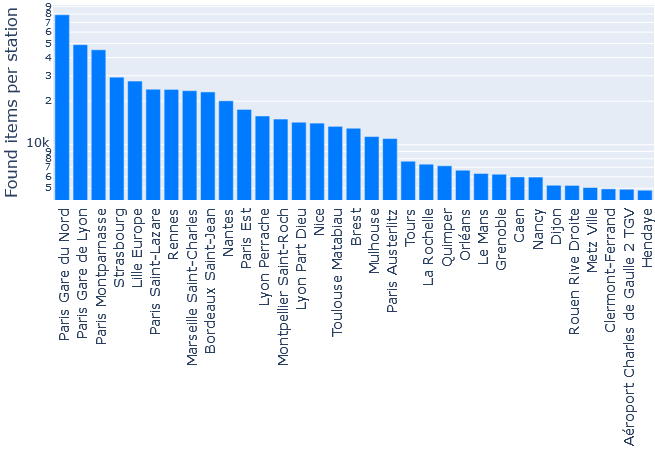

In [839]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=df_grouped.index, 
        y=df_grouped, 
        hoverinfo="x+y",
        name="Found items",
        marker_color="#007bff"
))

fig.update_layout(
    margin={'l':20, 'r': 0, 't': 0, 'b': 250},
    xaxis=dict(tickangle=-90,
               tickfont={'size': 14}),
    yaxis=dict(title="Found items per station",
               titlefont=dict(size=16),
               type="log")
)

fig.show()

In [840]:
py.plot(fig, filename = 'sncf-found-items', auto_open=True)

'https://plotly.com/~hugolmn/14/'

In [841]:
# grouping by year and month
df_months = df.groupby(by=[df.Date.dt.year, df.Date.dt.month]).Date.count()
df_months.index = df_months.index.map(lambda t: pd.to_datetime('-'.join(map(str, t))))

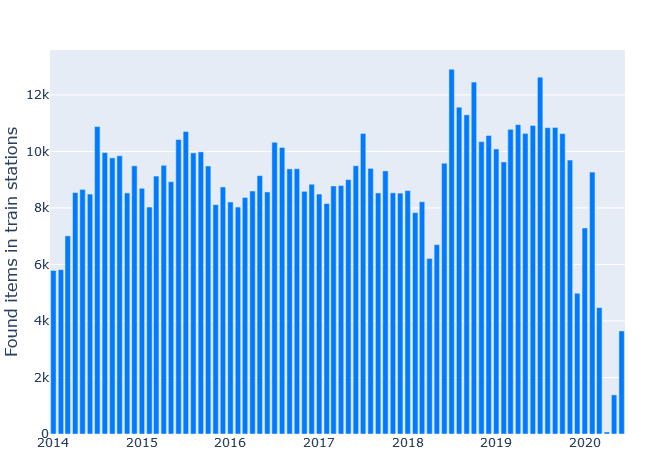

In [842]:
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_months.index,
        y=df_months, 
        hoverinfo="x+y",
        marker_color="#007bff",  
        name='Found items per month in train stations'
))

fig.update_layout(
    yaxis=dict(title="Found items in train stations", titlefont=dict(size=16)),
    margin={'l': 30, 'r': 30, 't': 50, 'b': 0},
)

In [843]:
py.plot(fig, filename='sncf-monthly-found-items', auto_open=True)

'https://plotly.com/~hugolmn/21/'